 # Step 1: Import libraries 

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 2: Load dataset

In [3]:

df = pd.read_csv("Telco_Cusomer_Churn.csv")

# Quick look

In [4]:
print(df.head())


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.shape

(7043, 21)

In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# Convert TotalCharges to numeric (some blanks cause errors)

In [9]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Fix SeniorCitizen column: 0 -> "No", 1 -> "Yes"

In [10]:
df["SeniorCitizen"] = df["SeniorCitizen"].map({0: "No", 1: "Yes"})

In [11]:
df.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

# Drop customerID (not useful for analysis)

In [12]:
df.drop("customerID", axis=1, inplace=True)

# Check missing values

In [13]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

# Handle missing values

In [14]:
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_9040\1479199042.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


In [15]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [22]:
df.duplicated().sum()

np.int64(22)

# Replace 'No internet service' and 'No phone service' with 'No'

In [23]:
cols_replace = [
    "OnlineSecurity", "OnlineBackup", "DeviceProtection",
    "TechSupport", "StreamingTV", "StreamingMovies",
    "MultipleLines"
]

for col in cols_replace:
    df[col] = df[col].replace({"No internet service": "No", "No phone service": "No"})


In [24]:
df["OnlineSecurity"].unique()

array(['No', 'Yes'], dtype=object)

# Convert Cleaned Data to Csv Data

In [25]:
df.to_csv("New_Telco_Cusomer_Churn.csv")

In [26]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2281.916928
std,24.559481,30.090047,2265.270398
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [27]:
print("Total Customers:", df.shape[0])
print("Churn Rate (%):", df["Churn"].value_counts(normalize=True)["Yes"] * 100)
print("Average Tenure (months):", df["tenure"].mean())
print("Average Monthly Charges:", df["MonthlyCharges"].mean())


Total Customers: 7043
Churn Rate (%): 26.536987079369588
Average Tenure (months): 32.37114865824223
Average Monthly Charges: 64.76169246059918


# Customer Churn Dstribution

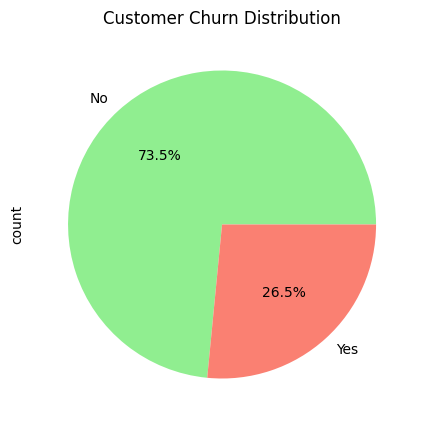

In [28]:
plt.figure(figsize=(5,5))
df["Churn"].value_counts().plot.pie(autopct="%1.1f%%", colors=["lightgreen","salmon"])
plt.title("Customer Churn Distribution")
plt.show()


# Churn by Gender, Senior Citizen, Contract, Internet Service

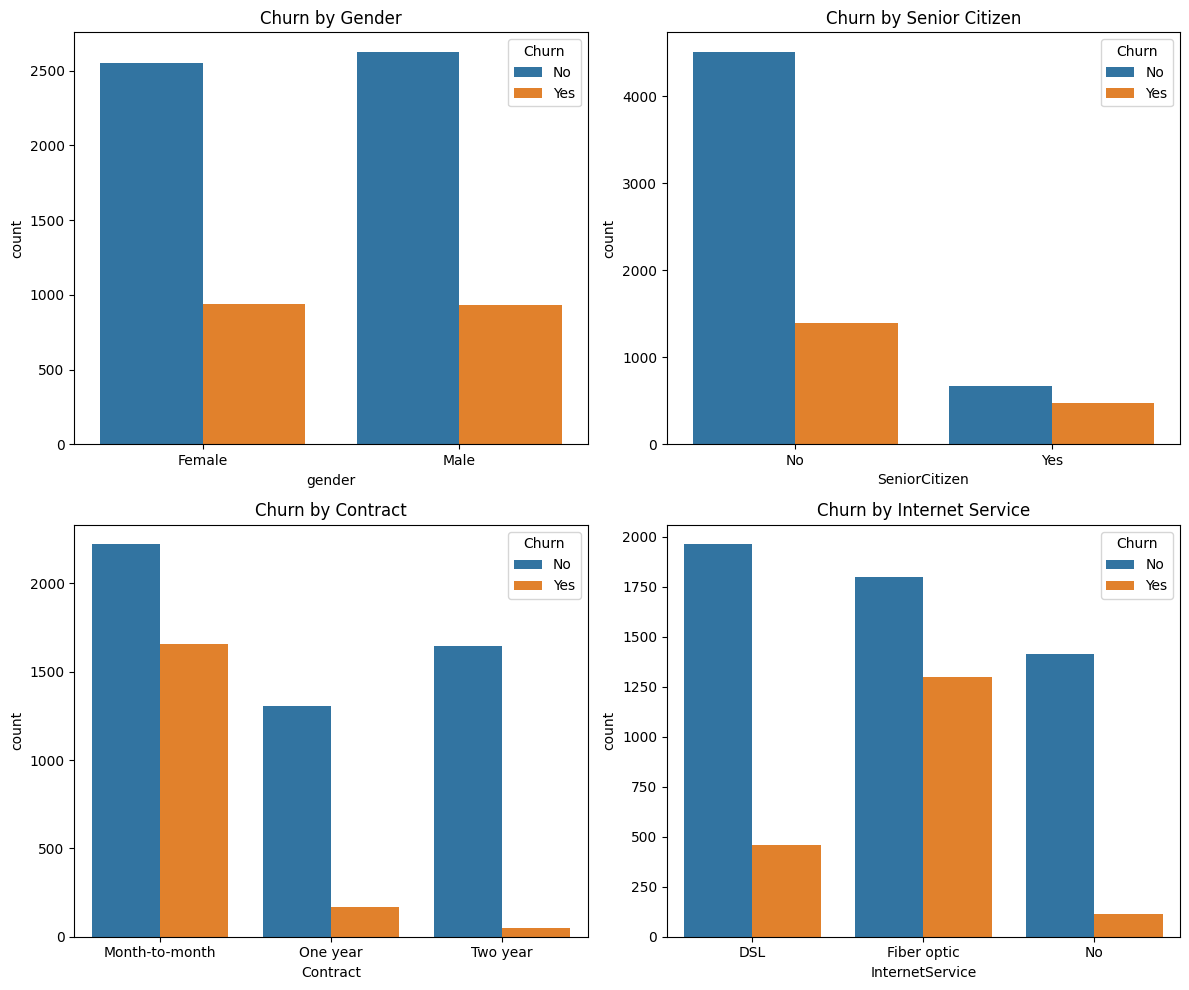

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Churn by Gender
sns.countplot(data=df, x="gender", hue="Churn", ax=axes[0,0])
axes[0,0].set_title("Churn by Gender")

# Churn by Senior Citizen
sns.countplot(data=df, x="SeniorCitizen", hue="Churn", ax=axes[0,1])
axes[0,1].set_title("Churn by Senior Citizen")

# Churn by Contract
sns.countplot(data=df, x="Contract", hue="Churn", ax=axes[1,0])
axes[1,0].set_title("Churn by Contract")

# Churn by Internet Service
sns.countplot(data=df, x="InternetService", hue="Churn", ax=axes[1,1])
axes[1,1].set_title("Churn by Internet Service")

plt.tight_layout()
plt.show()


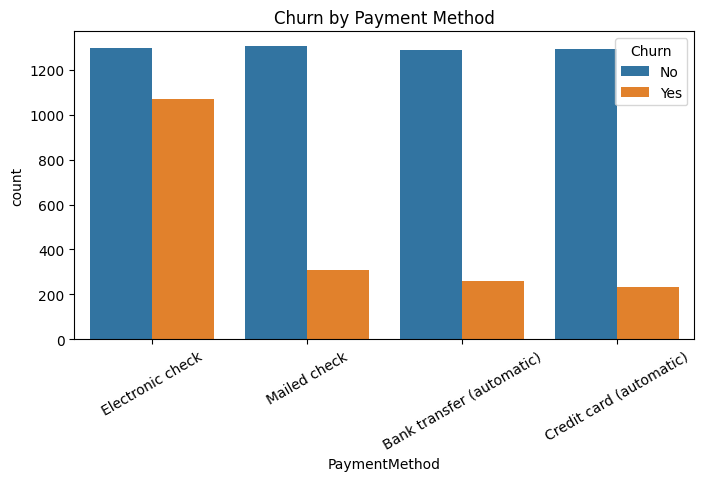

In [24]:
# --- Payment Method ---
plt.figure(figsize=(8,4))
sns.countplot(data=df, x="PaymentMethod", hue="Churn")
plt.title("Churn by Payment Method")
plt.xticks(rotation=30)
plt.show()

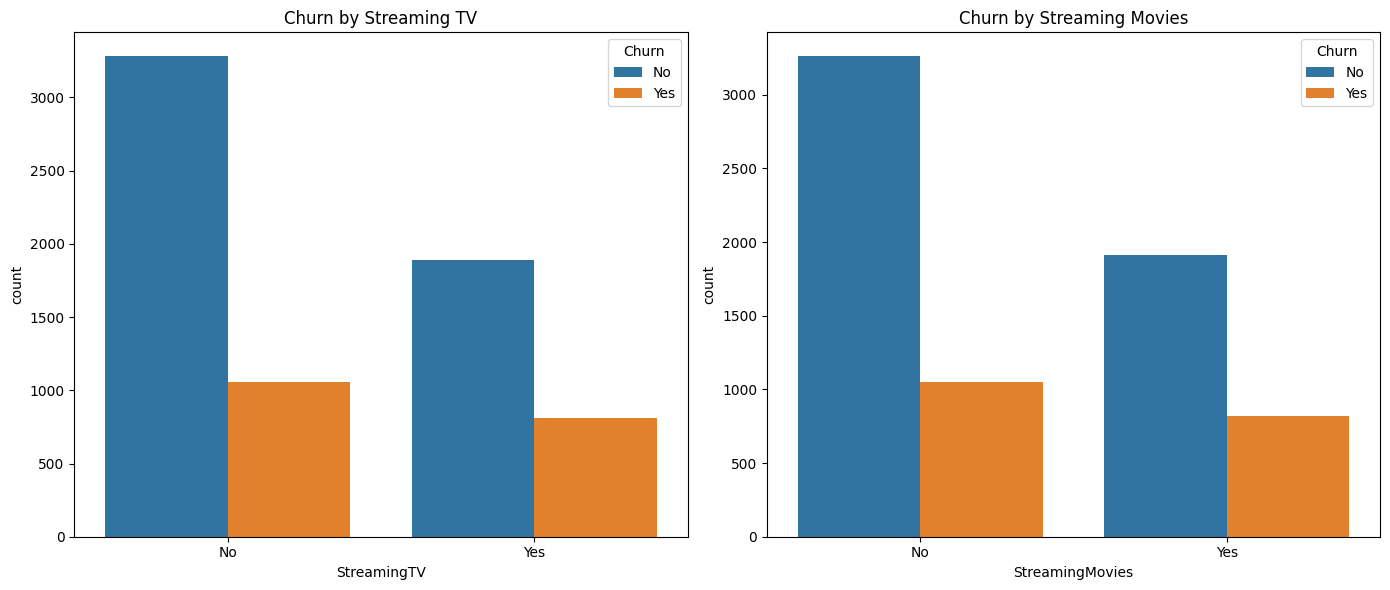

In [25]:
# --- Streaming Services ---
fig, axes = plt.subplots(1, 2, figsize=(14,6))
sns.countplot(data=df, x="StreamingTV", hue="Churn", ax=axes[0])
axes[0].set_title("Churn by Streaming TV")
sns.countplot(data=df, x="StreamingMovies", hue="Churn", ax=axes[1])
axes[1].set_title("Churn by Streaming Movies")
plt.tight_layout()
plt.show()

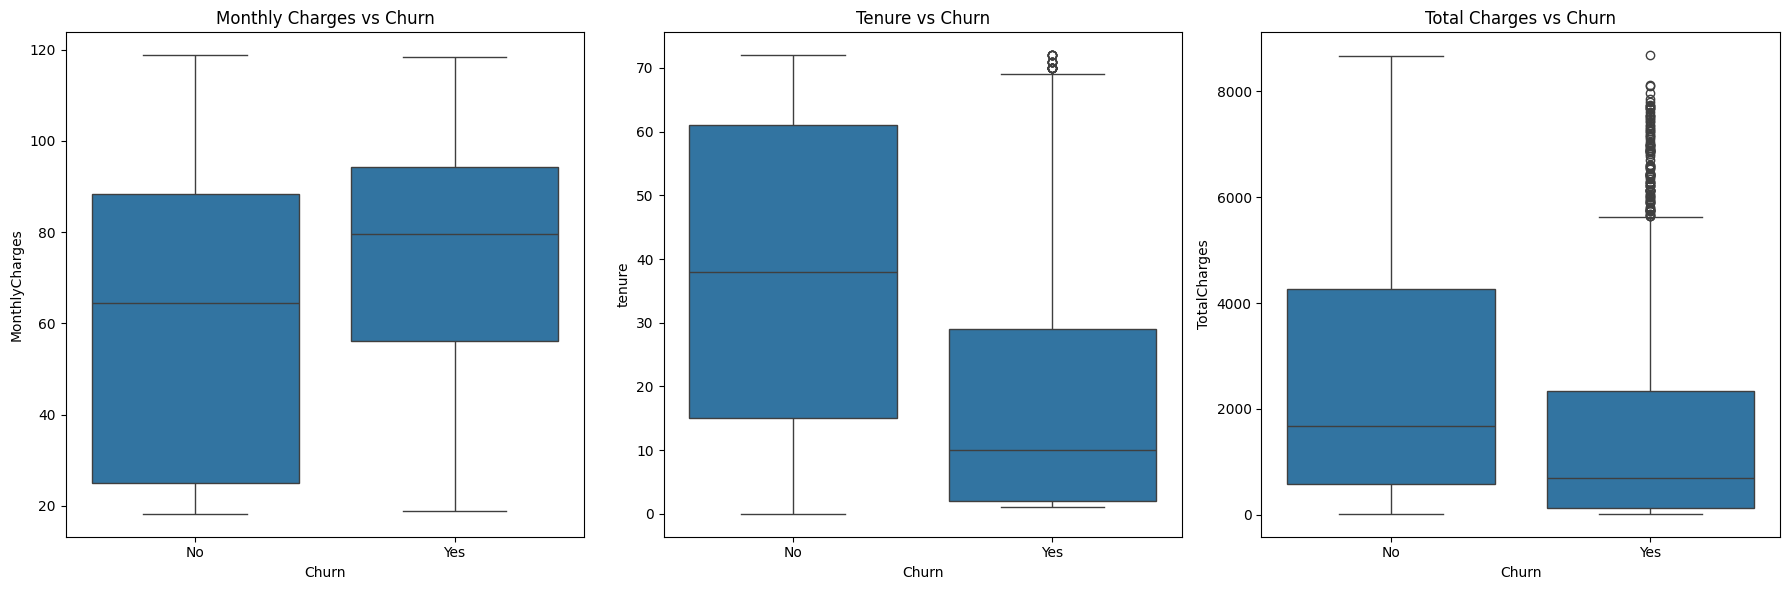

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(data=df, x="Churn", y="MonthlyCharges", ax=axes[0])
axes[0].set_title("Monthly Charges vs Churn")

sns.boxplot(data=df, x="Churn", y="tenure", ax=axes[1])
axes[1].set_title("Tenure vs Churn")

sns.boxplot(data=df, x="Churn", y="TotalCharges", ax=axes[2])
axes[2].set_title("Total Charges vs Churn")

plt.tight_layout()
plt.show()


In [27]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

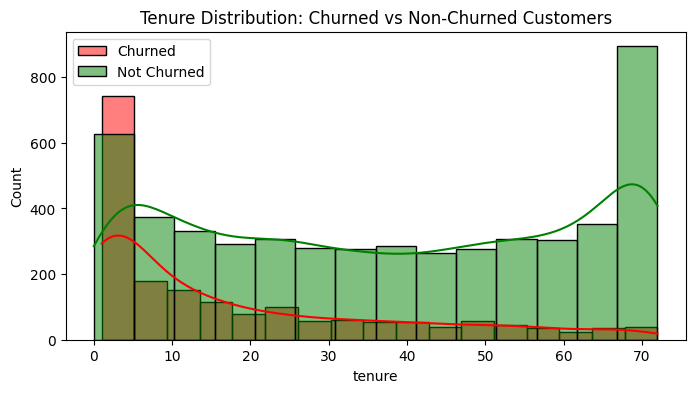

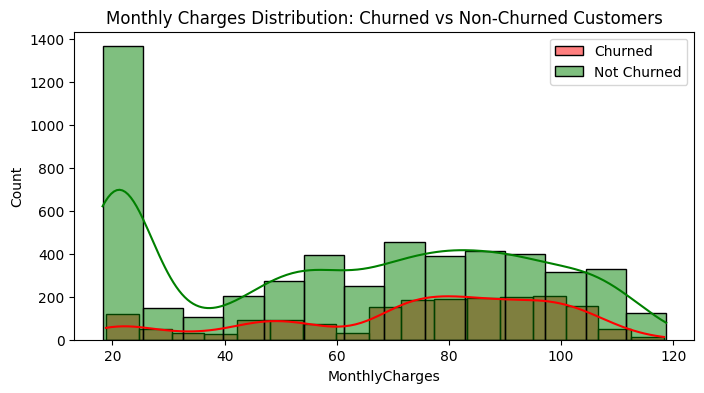

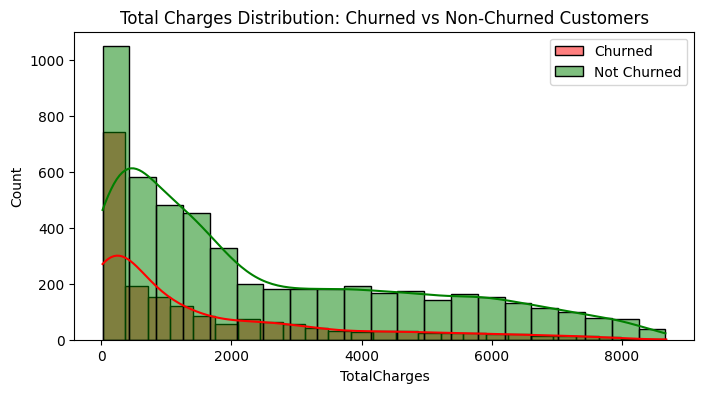

In [28]:
# --- Distribution Plots ---
plt.figure(figsize=(8,4))
sns.histplot(df[df["Churn"]=="Yes"]["tenure"], color="red", kde=True, label="Churned")
sns.histplot(df[df["Churn"]=="No"]["tenure"], color="green", kde=True, label="Not Churned")
plt.legend()
plt.title("Tenure Distribution: Churned vs Non-Churned Customers")
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(df[df["Churn"]=="Yes"]["MonthlyCharges"], color="red", kde=True, label="Churned")
sns.histplot(df[df["Churn"]=="No"]["MonthlyCharges"], color="green", kde=True, label="Not Churned")
plt.legend()
plt.title("Monthly Charges Distribution: Churned vs Non-Churned Customers")
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(df[df["Churn"]=="Yes"]["TotalCharges"], color="red", kde=True, label="Churned")
sns.histplot(df[df["Churn"]=="No"]["TotalCharges"], color="green", kde=True, label="Not Churned")
plt.legend()
plt.title("Total Charges Distribution: Churned vs Non-Churned Customers")
plt.show()

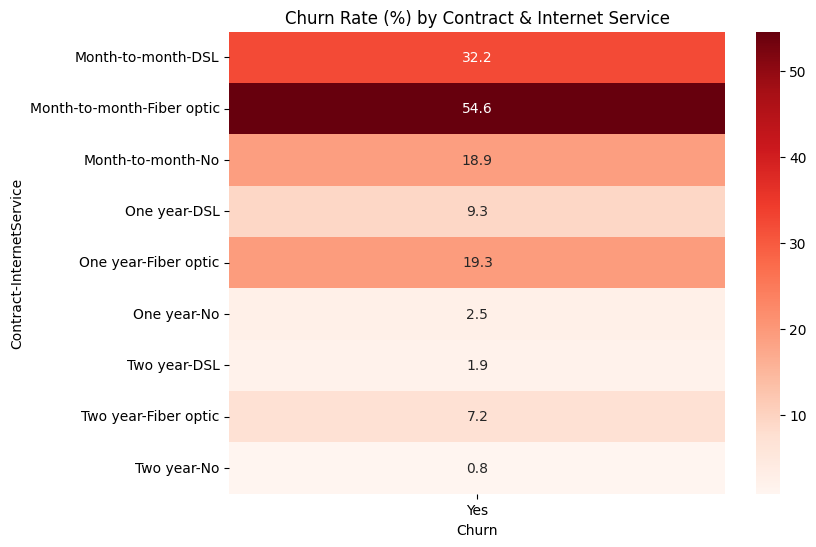

In [29]:
# --- Heatmap of Churn Rate by Contract & Internet Service ---
churn_rates = df.groupby(["Contract","InternetService"])["Churn"].value_counts(normalize=True).unstack().fillna(0)*100
plt.figure(figsize=(8,6))
sns.heatmap(churn_rates[["Yes"]], annot=True, fmt=".1f", cmap="Reds")
plt.title("Churn Rate (%) by Contract & Internet Service")
plt.show()

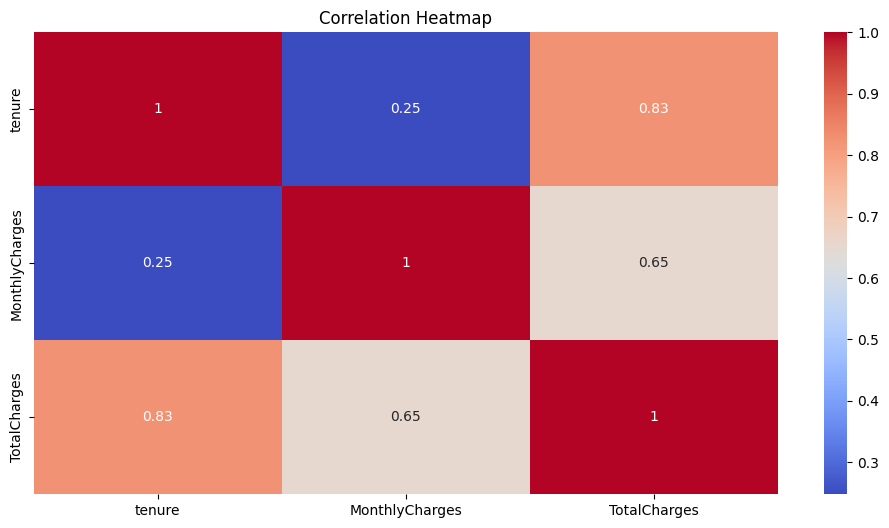

In [30]:
plt.figure(figsize=(12,6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


# 📌 Final Insights: Telco Customer Churn Analysis

After cleaning and analyzing the Telco Customer Churn dataset, here are the key findings:

### 1. Churn Overview
- Overall churn rate is **~26–27%**, meaning about 1 in 4 customers leave the company.  
- This is a significant business risk that needs attention.  

### 2. Customer Demographics
- **Gender**: Churn is nearly the same for male and female customers → gender is not a strong churn driver.  
- **Senior Citizens**: Higher churn compared to younger customers → older customers are more likely to leave.  

### 3. Service-Related Insights
- **Contract Type**:  
  - Customers on **month-to-month contracts** have the highest churn.  
  - Customers on **1-year or 2-year contracts** are more loyal.  
- **Internet Service**:  
  - **Fiber optic users** churn the most.  
  - DSL users are more stable.  
- **Streaming Services**: Customers with streaming services (TV/movies) show slightly higher churn, possibly due to higher monthly charges.  

### 4. Billing & Payments
- **Monthly Charges**: Customers with higher monthly charges tend to churn more.  
- **Payment Method**: Customers paying via **Electronic Check** have the highest churn rate.  

### 5. Customer Tenure
- New customers (low tenure) are much more likely to churn.  
- Long-term customers (higher tenure) tend to stay loyal.  

---

## 🎯 Business Recommendations
1. **Promote Long-Term Contracts**  
   - Offer discounts or incentives for customers to switch from month-to-month to annual contracts.  

2. **Focus on At-Risk Groups**  
   - Senior citizens, fiber optic users, and electronic check payers need targeted retention strategies.  

3. **Improve Onboarding Experience**  
   - Since churn is highest among new customers, better onboarding and engagement in the first few months can reduce churn.  

4. **Review Pricing & Billing**  
   - High monthly charges are linked to higher churn → consider loyalty discounts or flexible billing options.  

---

📊 **Conclusion:**  
The analysis highlights that churn is strongly linked to **contract type, internet service, payment method, and monthly charges**. By addressing these areas, the company can significantly reduce customer churn and improve long-term profitability.
